# Analytics Academy of Data Corner



## Machine Learning in Python 

##### Decision Trees



Student name: Kevin Ishigaki Setio

Submision date: 12th July 2022

In [1]:
# Load libraries

import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
col_names = ['pregnancies', 'glucose', 'bp', 'skinThickness', 'insulin', 'bmi', 'pedigree', 'age', 'label']


# load dataset
#Source: https://www.kaggle.com/datasets/saurabh00007/diabetescsv

df1 = pd.read_csv("diabetes.csv", header=None, names=col_names)



In [3]:
df1.head()

,pregnancies,glucose,bp,skinThickness,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pregnancies    768 non-null    int64  
 1   glucose        768 non-null    int64  
 2   bp             768 non-null    int64  
 3   skinThickness  768 non-null    int64  
 4   insulin        768 non-null    int64  
 5   bmi            768 non-null    float64
 6   pedigree       768 non-null    float64
 7   age            768 non-null    int64  
 8   label          768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df1.describe()

,pregnancies,glucose,bp,skinThickness,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Allocating the Train and Test datasets

In [6]:
#split dataset in features and target variable


feature_cols = ['pregnancies', 'glucose', 'bp', 'skinThickness', 'insulin', 'bmi', 'pedigree', 'age']

X = df1[feature_cols] # Features (Independent Variables)
Y = df1.label # Target variable (Dependent variables)

In [7]:
X.head()


,pregnancies,glucose,bp,skinThickness,insulin,bmi,pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [8]:
X.shape

(768, 8)

In [9]:
Y.shape

(768,)

In [10]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: label, dtype: int64

In [11]:
# Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test


In [12]:
# 70%
X_train.shape

(537, 8)

In [13]:
# 30%
X_test.shape

(231, 8)

In [14]:
# 70%
y_train.shape

(537,)

In [15]:
# 30%
y_test.shape

(231,)

In [16]:
# Create Decision Tree classifer object

clf = DecisionTreeClassifier()

In [17]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [18]:
X_test.head()

,pregnancies,glucose,bp,skinThickness,insulin,bmi,pedigree,age
285,7,136,74,26,135,26.0,0.647,51
101,1,151,60,0,0,26.1,0.179,22
581,6,109,60,27,0,25.0,0.206,27
352,3,61,82,28,0,34.4,0.243,46
726,1,116,78,29,180,36.1,0.496,25


In [19]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [20]:
print (y_pred)

[0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0
 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0
 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0]


In [21]:
print(y_test)

285    0
101    0
581    0
352    0
726    0
      ..
241    0
599    0
650    0
11     1
214    1
Name: label, Length: 231, dtype: int64


In [22]:
y_pred.shape

(231,)

In [23]:
y_test.shape

(231,)

### Measuring the accuracy of Model

In [24]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7012987012987013


In [25]:
# Build confusion metrics
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm

array([[115,  31],
       [ 38,  47]], dtype=int64)

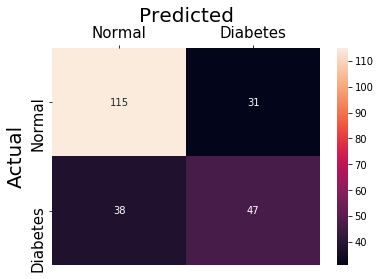

In [26]:
# Plot confusion matrix in a beautiful manner
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['Normal', 'Diabetes'], fontsize = 15)
ax.xaxis.tick_top()

ax.set_ylabel('Actual', fontsize=20)
ax.yaxis.set_ticklabels(['Normal', 'Diabetes'], fontsize = 15)
plt.show()

### Visualizaing the Tree

You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. For plotting tree, you also need to install graphviz and pydotplus.

pip install graphviz

pip install pydotplus

In [27]:
# --- if needed:

import sys
!{sys.executable} -m pip install graphviz
!{sys.executable} -m pip install pydotplus

In [28]:
import sys
!conda install --yes --prefix {sys.prefix} graphviz

Solving environment: ...working... done

## Package Plan ##

  environment location: D:\Users\Kevin\anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.13.0               |   py37haa95532_0         911 KB
    ------------------------------------------------------------
                                           Total:         911 KB

The following packages will be UPDATED:

  conda                               4.12.0-py37haa95532_0 --> 4.13.0-py37haa95532_0




conda-4.13.0         | 911 KB    |            |   0% 
conda-4.13.0         | 911 KB    | ##6        |  26% 
conda-4.13.0         | 911 KB    | ########## | 100% 
conda-4.13.0         | 911 KB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [29]:
!pip install six

In [27]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

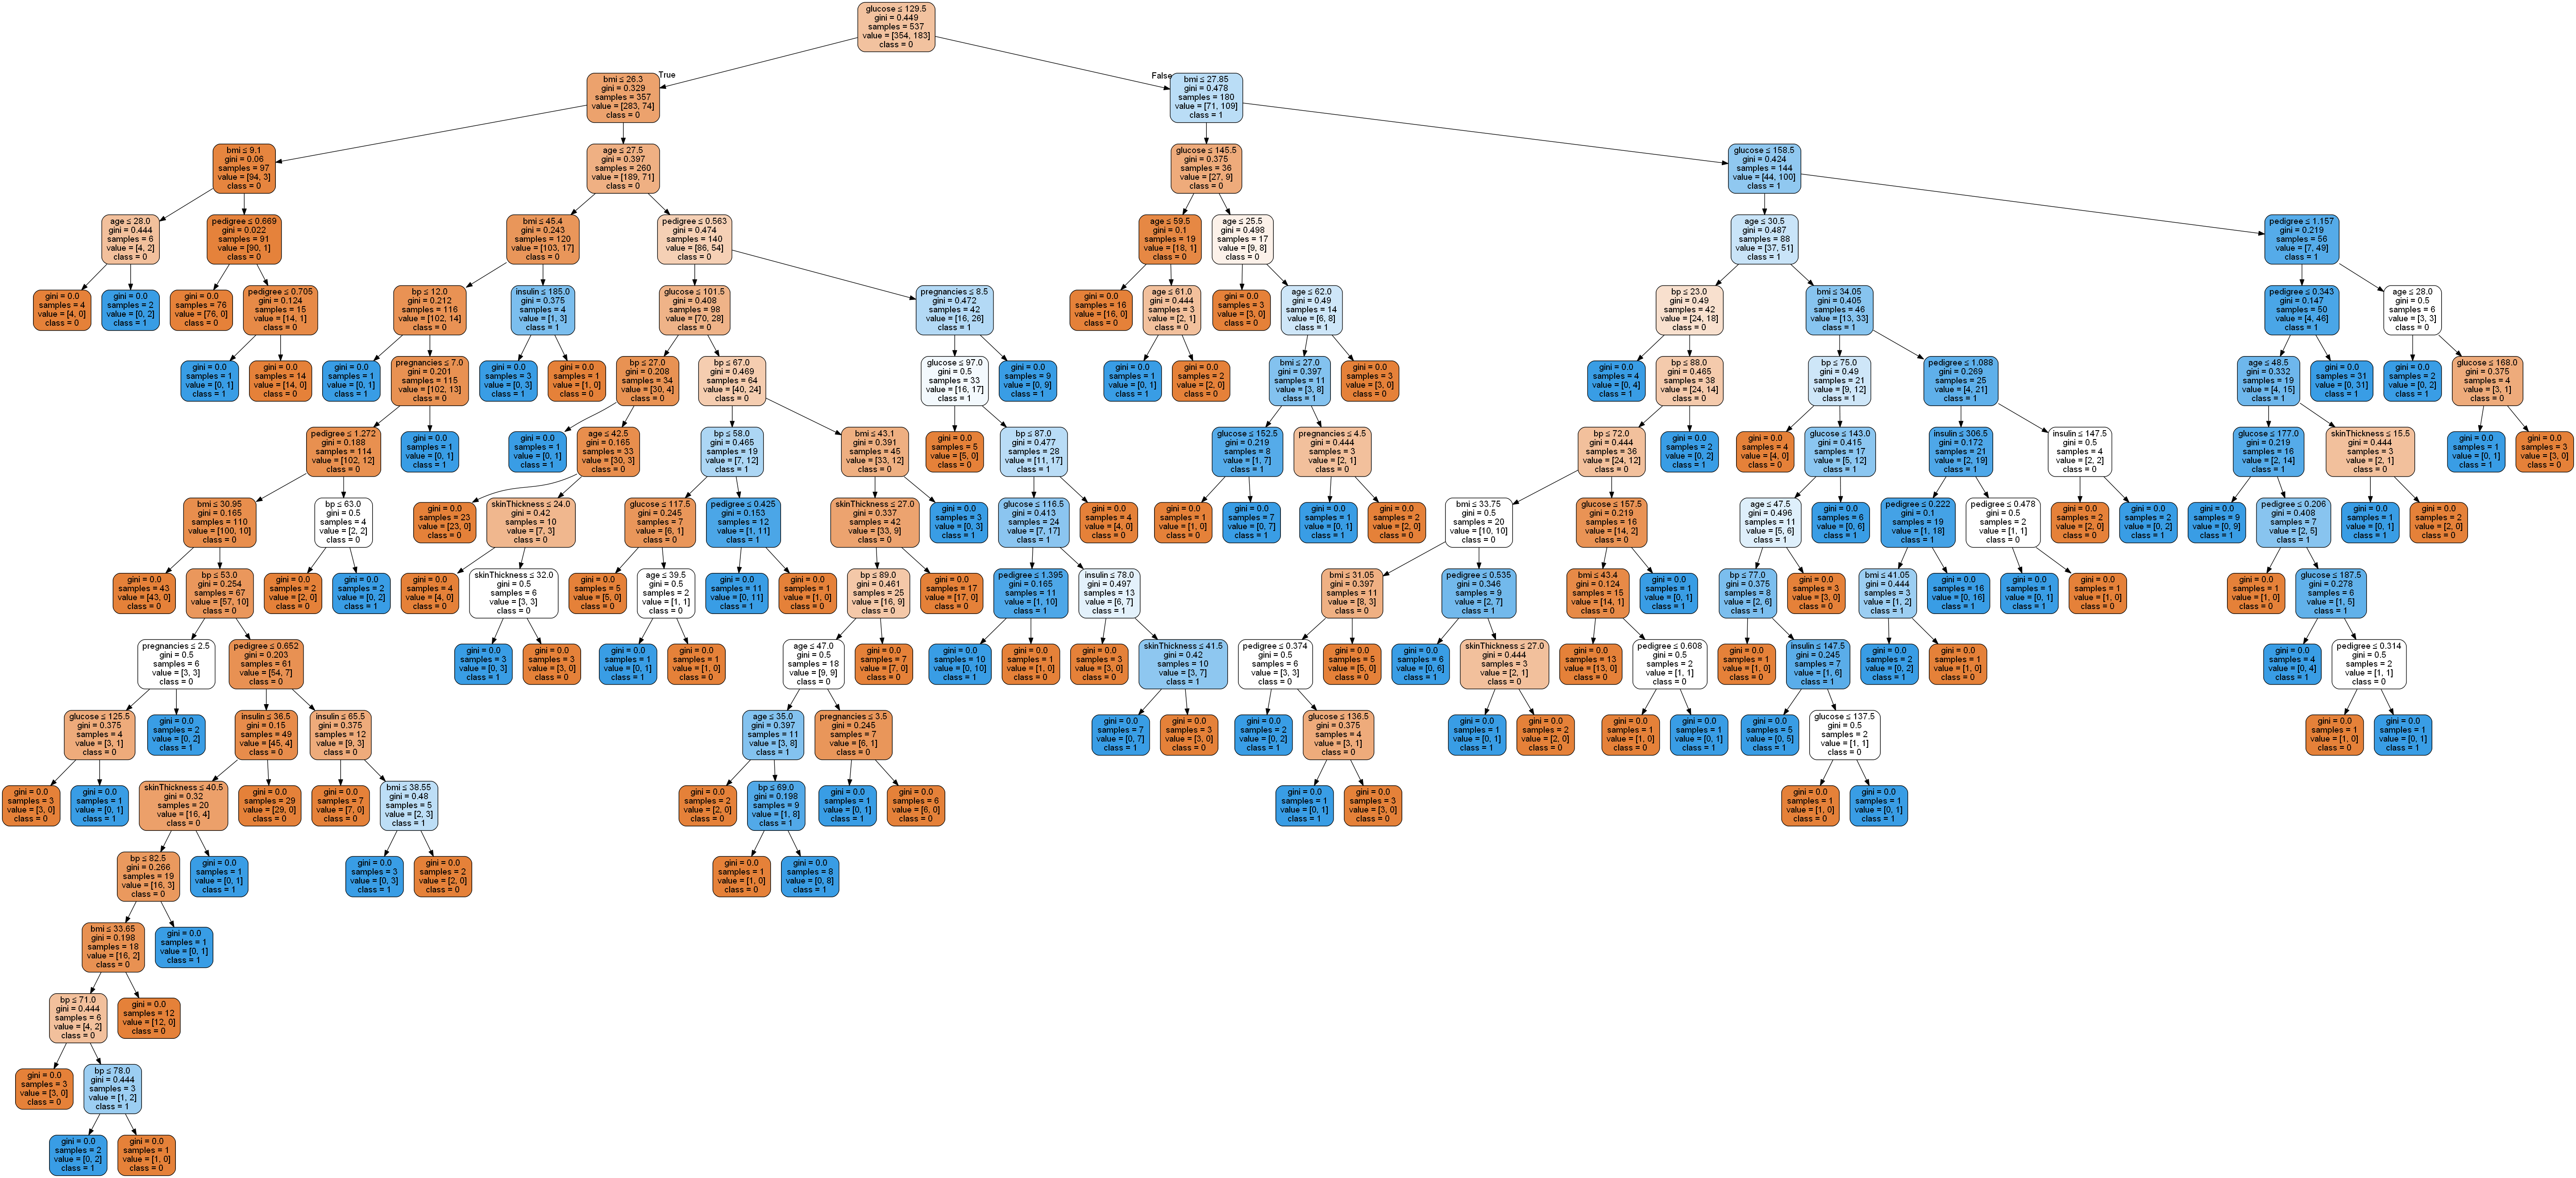

In [28]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

## Pruning the tree

criterion="gini", max_depth=4

In [29]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


In [30]:
# Build confusion metrics
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm

array([[124,  22],
       [ 31,  54]], dtype=int64)

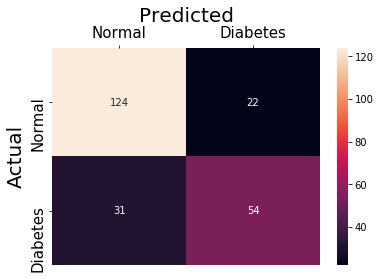

In [31]:
# Plot confusion matrix in a beautiful manner
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['Normal', 'Diabetes'], fontsize = 15)
ax.xaxis.tick_top()

ax.set_ylabel('Actual', fontsize=20)
ax.yaxis.set_ticklabels(['Normal', 'Diabetes'], fontsize = 15)
plt.show()

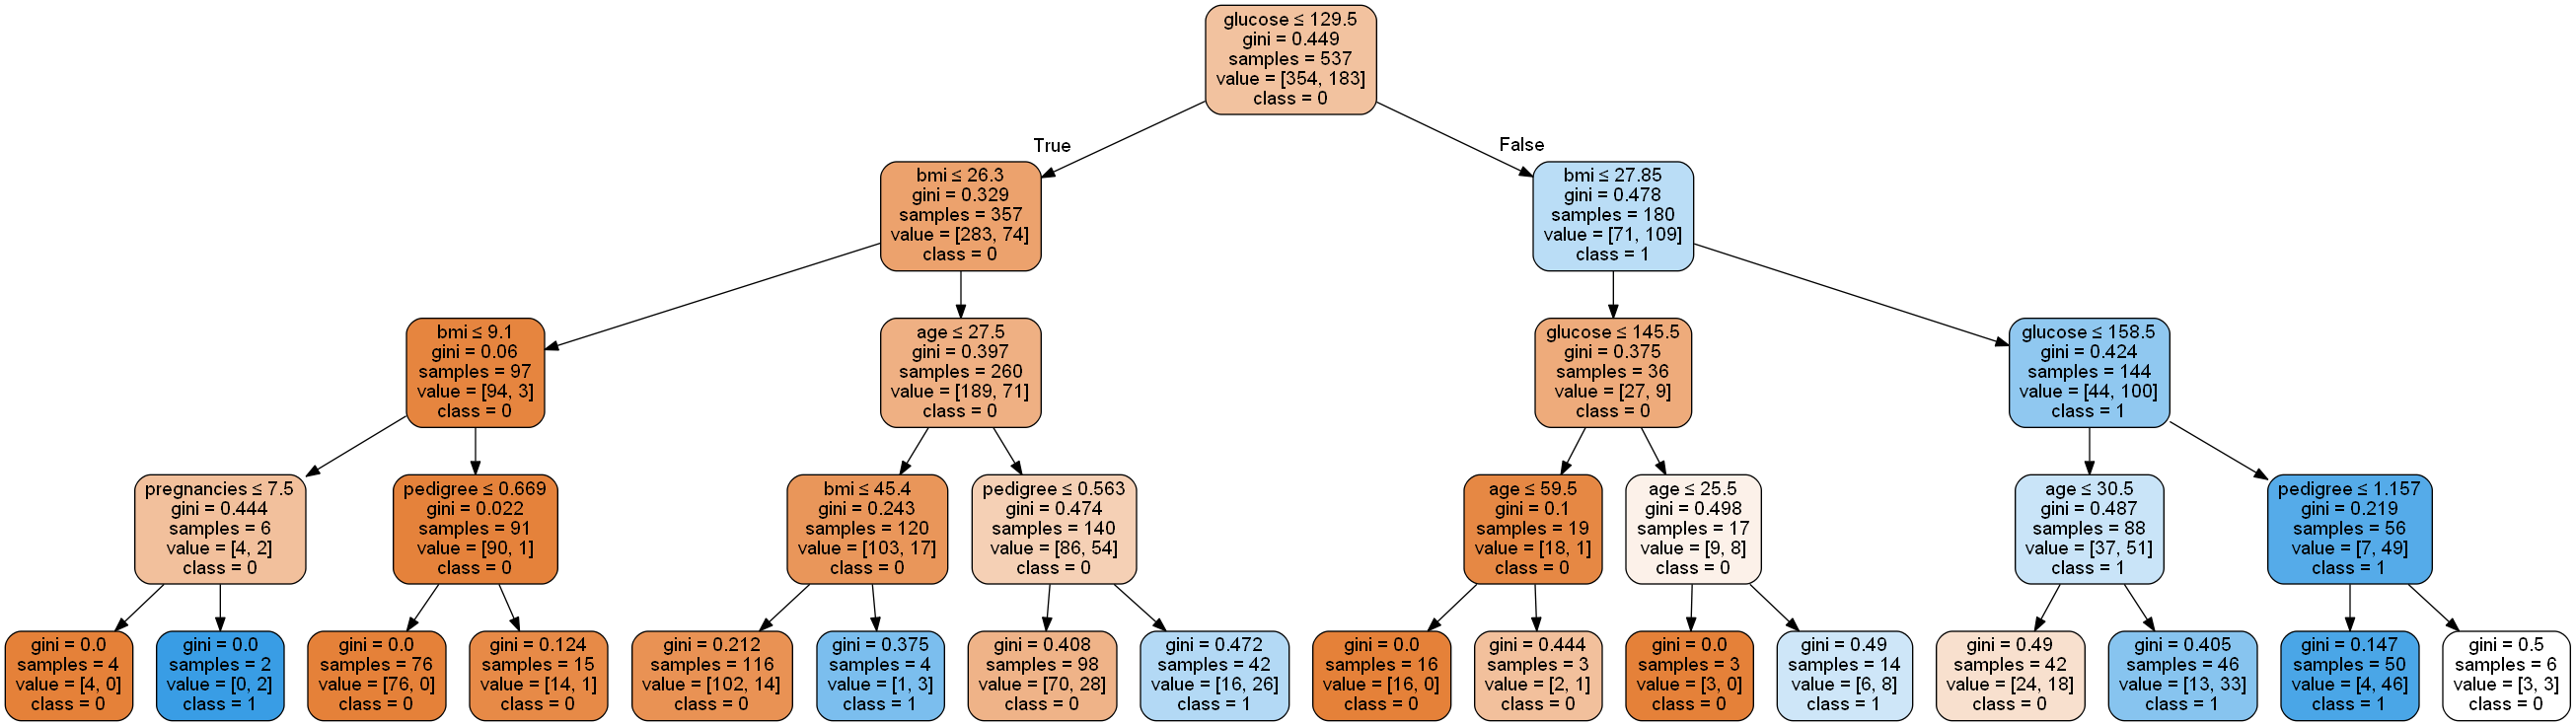

In [33]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

# Lab Activity

Rebuild the model with following callibrations:

1. Consider 80% and 90% for training dataset

2. Try the follwoing parameters and check the accuracy

    *criterion="gini" max_depth=5*
    
    *criterion="gini" max_depth=3*
    
    *criterion="entropy" max_depth=5*
    
    *criterion="entropy" max_depth=3*
    
    
After finding the model with the highest accuracy:

    - Build the final decision tree
    - Build the confusion Matrxi
    - Calcuate teh accuracy of your model

#### With 90% training

In [42]:
# Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state=1) # 90% training and 10% test


In [43]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7662337662337663


In [44]:
# Create Decision Tree classifer object
clf2 = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf2 = clf2.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf2.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7792207792207793


In [45]:
# Create Decision Tree classifer object
clf3 = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf3 = clf3.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf3.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7402597402597403


In [46]:
# Create Decision Tree classifer object
clf4 = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf4 = clf4.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf4.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7792207792207793


Best model: 

clf2/clf4 - Accuracy: 0.7792207792207793

#### With 80% training

In [47]:
# Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=1) # 80% training and 20% test


In [48]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7467532467532467


In [49]:
# Create Decision Tree classifer object
clf2 = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf2 = clf2.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf2.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7857142857142857


In [50]:
# Create Decision Tree classifer object
clf3 = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf3 = clf3.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf3.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7792207792207793


In [51]:
# Create Decision Tree classifer object
clf4 = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf4 = clf4.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf4.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7987012987012987


Best model: 

clf4, 80% training - Accuracy: 0.7987012987012987

In [52]:
# Build confusion metrics
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm

array([[88, 11],
       [20, 35]], dtype=int64)

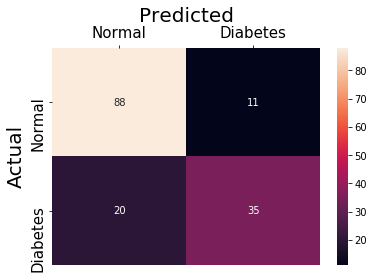

In [53]:
# Plot confusion matrix in a beautiful manner
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['Normal', 'Diabetes'], fontsize = 15)
ax.xaxis.tick_top()

ax.set_ylabel('Actual', fontsize=20)
ax.yaxis.set_ticklabels(['Normal', 'Diabetes'], fontsize = 15)
plt.show()

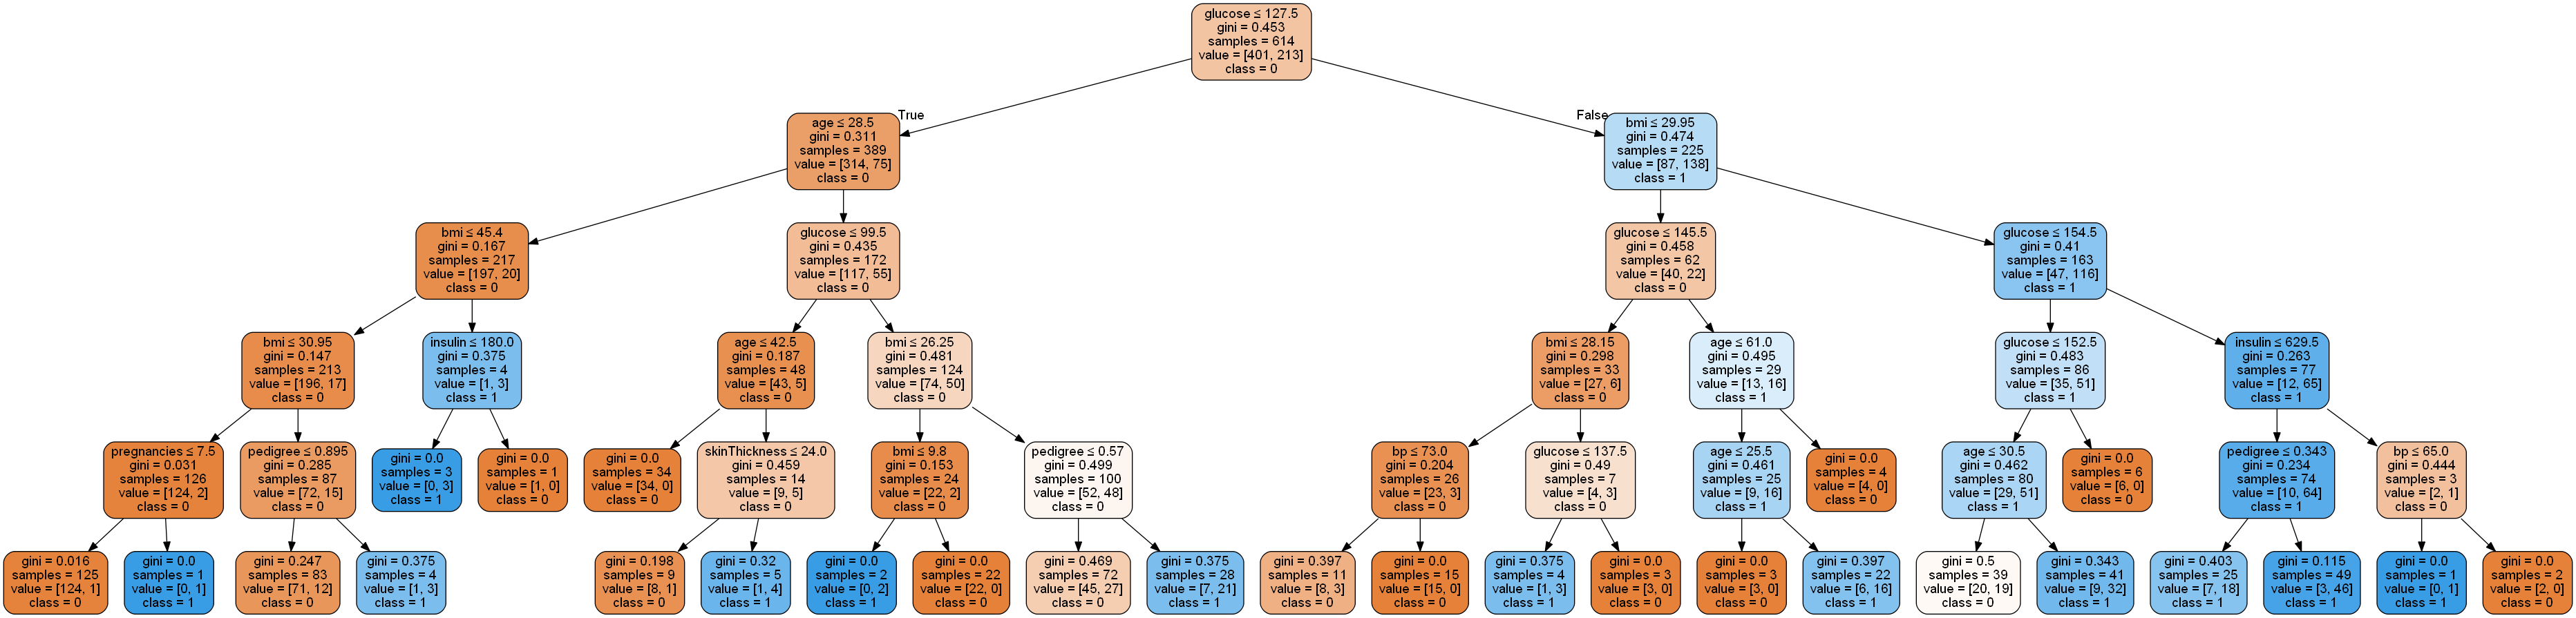

In [54]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())